# Target Market Analysis
## (Predict potential customer & Advertisment spending calculation)

## Introduction 
Online shopping is a huge and growing form of purchasing and represents a huge portion of B2C (Business to Customer) revenue. Learning how and when shoppers respond to advertisements and purchase goods online is important to businesses as they can use customer behavior insights to target advertising, marketing, and deals to potential customers to further increase their sales and revenue.

## Objective 
In this project, we specifically aim to determine the potential customers who will purchase if you send the advertisement and answer the following questions:
1)Cost to send advertisement for each model
2)Profit of each model and the best model
3)Loss of each model
4)Revenue of each model


## Importing Packages

In [1]:
# Importing relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import roc_auc_score, f1_score, SCORERS
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

## Data Wrangling (Cleaning & Merging)
### Load the Data into DataFrame. Checking the existance of missing values, the type of variables, or integrity of data.

In [2]:
# Load the data into data dataframe
# View first 5 rows of dataframe
# Ad_Res is Response to advertisements
# Cust Prop is Customer Properties 
data = pd.read_csv('../data/data.csv')
data.head().T

,0,1,2,3,4
Potential_Customer,1,1,0,1,1
C_ID,9946,87939,88003,188721,88056
Cust_Last_Purchase,$5.00,$30.00,NaN,$20.00,$5.00
Pur_3_years,2,1,5,1,3
Pur_5_years,17,7,12,11,15
Pur_3_years_Indirect,2,0,3,0,2
Pur_5_years_Indirect,4,3,5,3,7
Pur_latest,$0.00,$25.00,$15.00,$20.00,$3.00
Pur_3_years_Avg,$7.50,$25.00,$15.00,$20.00,$4.33
Pur_5_years_Avg,$7.76,$13.00,$11.25,$12.45,$3.80


In [3]:
# View data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Potential_Customer,4469.0,0.480868,0.499690,0.0,0.0,0.0,1.0,1.0
C_ID,4469.0,73837.719848,36156.968605,12.0,52713.0,75790.0,93705.0,191672.0
Pur_3_years,4469.0,3.297158,2.207326,0.0,2.0,3.0,4.0,15.0
Pur_5_years,4469.0,11.006042,9.459082,1.0,4.0,9.0,15.0,91.0
Pur_3_years_Indirect,4469.0,1.897516,1.629178,0.0,1.0,2.0,3.0,9.0
Pur_5_years_Indirect,4469.0,5.867756,4.939174,0.0,2.0,4.0,9.0,41.0
InAct_Last,4469.0,17.923697,4.130671,4.0,16.0,18.0,20.0,27.0
InAct_First,4469.0,73.605952,38.094688,15.0,40.0,74.0,111.0,260.0
Ad_Res_1_year,4469.0,13.070038,4.991064,3.0,11.0,12.0,13.0,49.0
Ad_Res_3_Year,4469.0,29.631237,7.787209,5.0,26.0,31.0,34.0,71.0


In [4]:
print(f'There are {len(data)} rows and {len(data.columns)} columns')

There are 4469 rows and 25 columns


In [5]:
#Check type of variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4469 entries, 0 to 4468
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Potential_Customer        4469 non-null   int64  
 1   C_ID                      4469 non-null   int64  
 2   Cust_Last_Purchase        2149 non-null   object 
 3   Pur_3_years               4469 non-null   int64  
 4   Pur_5_years               4469 non-null   int64  
 5   Pur_3_years_Indirect      4469 non-null   int64  
 6   Pur_5_years_Indirect      4469 non-null   int64  
 7   Pur_latest                4469 non-null   object 
 8   Pur_3_years_Avg           4469 non-null   object 
 9   Pur_5_years_Avg           4469 non-null   object 
 10  Pur_3_years_Avg_Indirect  3642 non-null   object 
 11  InAct_Last                4469 non-null   int64  
 12  InAct_First               4469 non-null   int64  
 13  Ad_Res_1_year             4469 non-null   int64  
 14  Ad_Res_3

In [6]:
#Convert numerical columns that have Dollar sign, or Comma.
data.Cust_Last_Purchase=data.Cust_Last_Purchase.str.replace('$', '')
data.Pur_latest=data.Pur_latest.str.replace('$', '')
data.Pur_3_years_Avg=data.Pur_3_years_Avg.str.replace('$', '')
data.Pur_5_years_Avg=data.Pur_5_years_Avg.str.replace('$', '')
data.Pur_3_years_Avg_Indirect=data.Pur_3_years_Avg_Indirect.str.replace('$', '')
data.Cust_Ann_Income=data.Cust_Ann_Income.str.replace('$', '')
data.Cust_Ann_Income=data.Cust_Ann_Income.str.replace(',', '')

#Create a list of the name of the categorical columns and the numerical columns
CatCols=['Potential_Customer','Status_Cust', 'Status_Latest_Ad','C_ID',
         'Gender', 'Cust_Prop']
NumCols=list(set(data.columns)-set(CatCols))

#Fix the type of the columns
data[CatCols] = data[CatCols].apply(lambda x: x.astype('category'))
data[NumCols] = data[NumCols].apply(lambda x: x.astype('float64'))

#Check type variable, we only want category and float64
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4469 entries, 0 to 4468
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Potential_Customer        4469 non-null   category
 1   C_ID                      4469 non-null   category
 2   Cust_Last_Purchase        2149 non-null   float64 
 3   Pur_3_years               4469 non-null   float64 
 4   Pur_5_years               4469 non-null   float64 
 5   Pur_3_years_Indirect      4469 non-null   float64 
 6   Pur_5_years_Indirect      4469 non-null   float64 
 7   Pur_latest                4469 non-null   float64 
 8   Pur_3_years_Avg           4469 non-null   float64 
 9   Pur_5_years_Avg           4469 non-null   float64 
 10  Pur_3_years_Avg_Indirect  3642 non-null   float64 
 11  InAct_Last                4469 non-null   float64 
 12  InAct_First               4469 non-null   float64 
 13  Ad_Res_1_year             4469 non-null   float6

In [7]:
#Check if there is any data duplicated 
duplicates = data.duplicated()
duplicates.sum()

851

In [8]:
#drop the duplicated entries
data = data.drop_duplicates() 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3618 entries, 0 to 3617
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Potential_Customer        3618 non-null   category
 1   C_ID                      3618 non-null   category
 2   Cust_Last_Purchase        1736 non-null   float64 
 3   Pur_3_years               3618 non-null   float64 
 4   Pur_5_years               3618 non-null   float64 
 5   Pur_3_years_Indirect      3618 non-null   float64 
 6   Pur_5_years_Indirect      3618 non-null   float64 
 7   Pur_latest                3618 non-null   float64 
 8   Pur_3_years_Avg           3618 non-null   float64 
 9   Pur_5_years_Avg           3618 non-null   float64 
 10  Pur_3_years_Avg_Indirect  2956 non-null   float64 
 11  InAct_Last                3618 non-null   float64 
 12  InAct_First               3618 non-null   float64 
 13  Ad_Res_1_year             3618 non-null   float6

In [9]:
#Drop useless column such C_ID 
data.drop('C_ID', axis=1, inplace=True)
CatCols.remove('C_ID')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3618 entries, 0 to 3617
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Potential_Customer        3618 non-null   category
 1   Cust_Last_Purchase        1736 non-null   float64 
 2   Pur_3_years               3618 non-null   float64 
 3   Pur_5_years               3618 non-null   float64 
 4   Pur_3_years_Indirect      3618 non-null   float64 
 5   Pur_5_years_Indirect      3618 non-null   float64 
 6   Pur_latest                3618 non-null   float64 
 7   Pur_3_years_Avg           3618 non-null   float64 
 8   Pur_5_years_Avg           3618 non-null   float64 
 9   Pur_3_years_Avg_Indirect  2956 non-null   float64 
 10  InAct_Last                3618 non-null   float64 
 11  InAct_First               3618 non-null   float64 
 12  Ad_Res_1_year             3618 non-null   float64 
 13  Ad_Res_3_Year             3618 non-null   float6

## Exploratory Data Analysis 
### Checking the relationship between variables, summary of data, outliers.

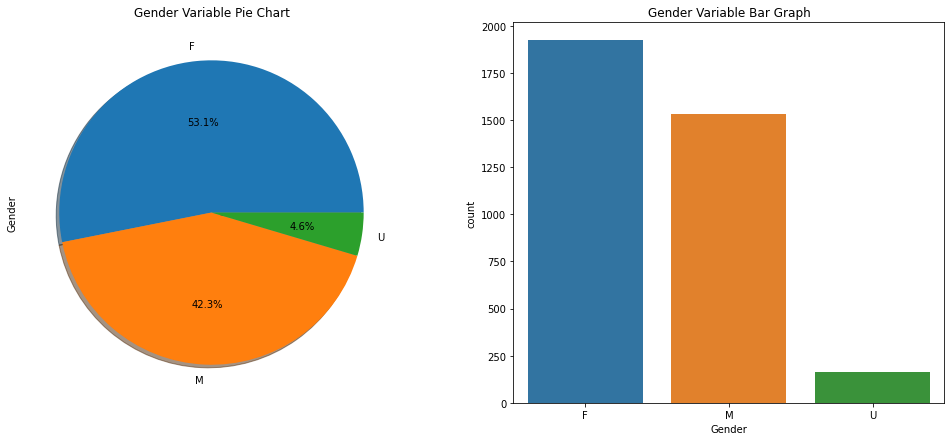

In [10]:
#Plot proportion of categories for gender
f,axes=plt.subplots(1,2,figsize=(17,7))
data['Gender'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
sns.countplot('Gender',data=data,ax=axes[1])
axes[0].set_title('Gender Variable Pie Chart')
axes[1].set_title('Gender Variable Bar Graph')
plt.show()


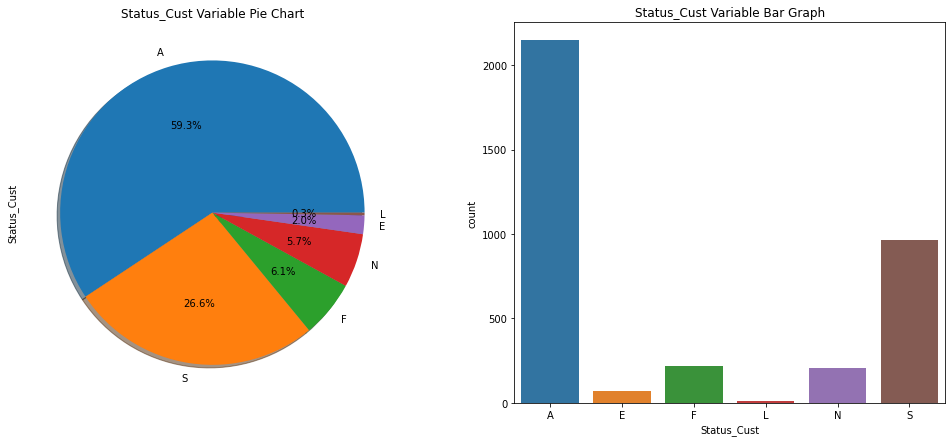

In [11]:
#Plot proportion of categories for Status_Cust
f,axes=plt.subplots(1,2,figsize=(17,7))
data['Status_Cust'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
sns.countplot('Status_Cust',data=data,ax=axes[1])
axes[0].set_title('Status_Cust Variable Pie Chart')
axes[1].set_title('Status_Cust Variable Bar Graph')
plt.show()

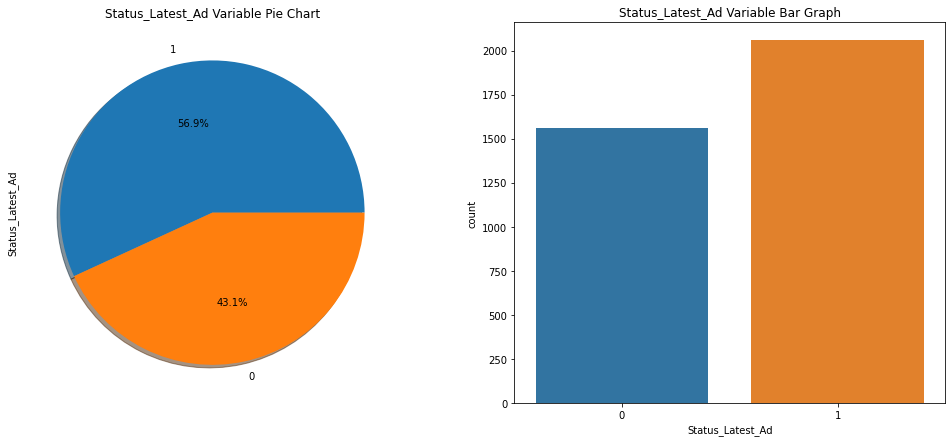

In [12]:
#Plot proportion of categories for Status_Latest_Ad
f,axes=plt.subplots(1,2,figsize=(17,7))
data['Status_Latest_Ad'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
sns.countplot('Status_Latest_Ad',data=data,ax=axes[1])
axes[0].set_title('Status_Latest_Ad Variable Pie Chart')
axes[1].set_title('Status_Latest_Ad Variable Bar Graph')
plt.show()

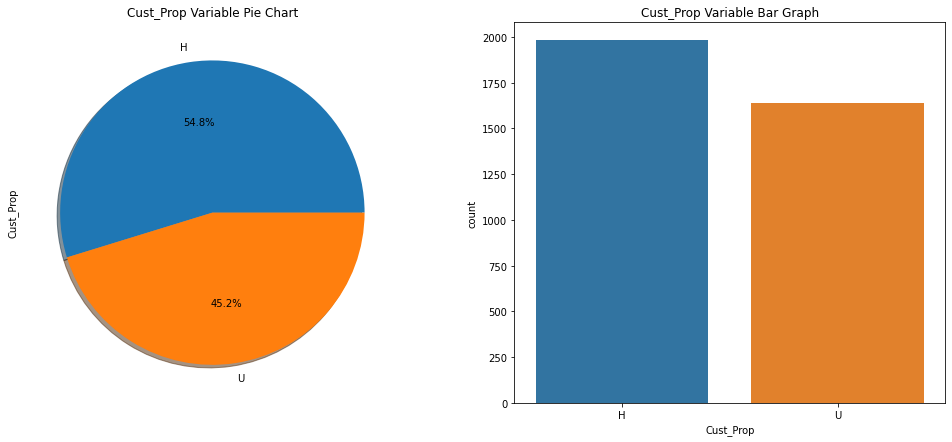

In [13]:
#Plot proportion of categories for Cust_Prop
f,axes=plt.subplots(1,2,figsize=(17,7))
data['Cust_Prop'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
sns.countplot('Cust_Prop',data=data,ax=axes[1])
axes[0].set_title('Cust_Prop Variable Pie Chart')
axes[1].set_title('Cust_Prop Variable Bar Graph')
plt.show()

### Status_Cust is usefull but categories can be combined

In [14]:
#Combined Status_Cust into 3 categories only
mapper = {'A':'A','S':'S' ,'E': 'other', 'F': 'other','N':'other', 'L':'other' }
data['Status_Cust_new'] = data['Status_Cust'].replace(mapper)
CatCols = CatCols + ['Status_Cust_new']
CatCols.remove('Status_Cust')

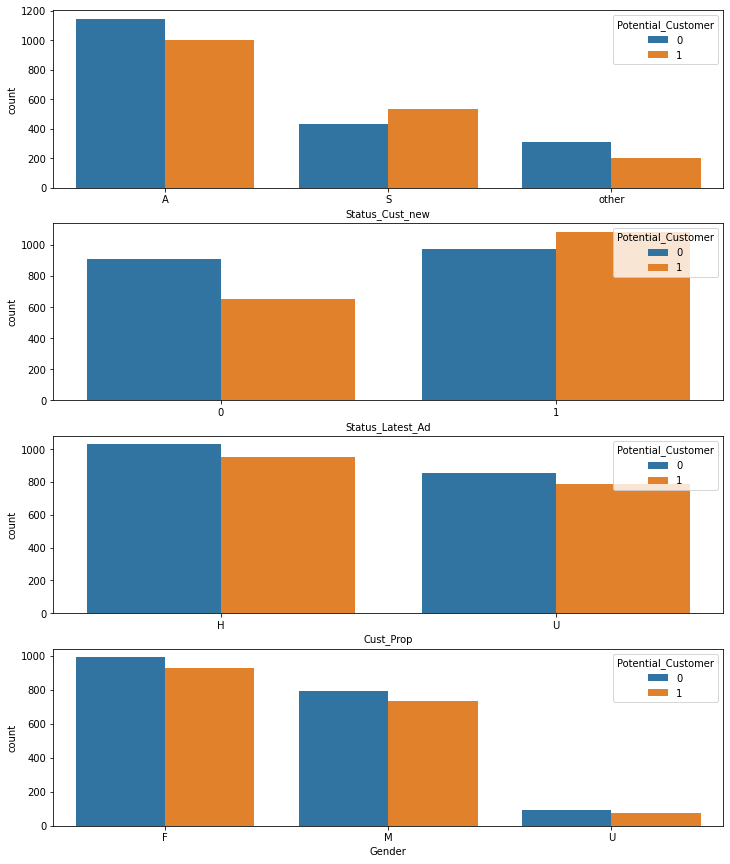

In [15]:
#Investigate the relationship between categorical and target variable 
CatFeature=list(set(CatCols)-set(['Potential_Customer']))
fig, ax=plt.subplots(nrows=len(CatFeature), figsize=(12,15))
for i in np.arange(len(CatFeature)): 
    sns.countplot(x=data[CatFeature[i]], hue=data.Potential_Customer,ax=ax[i]);

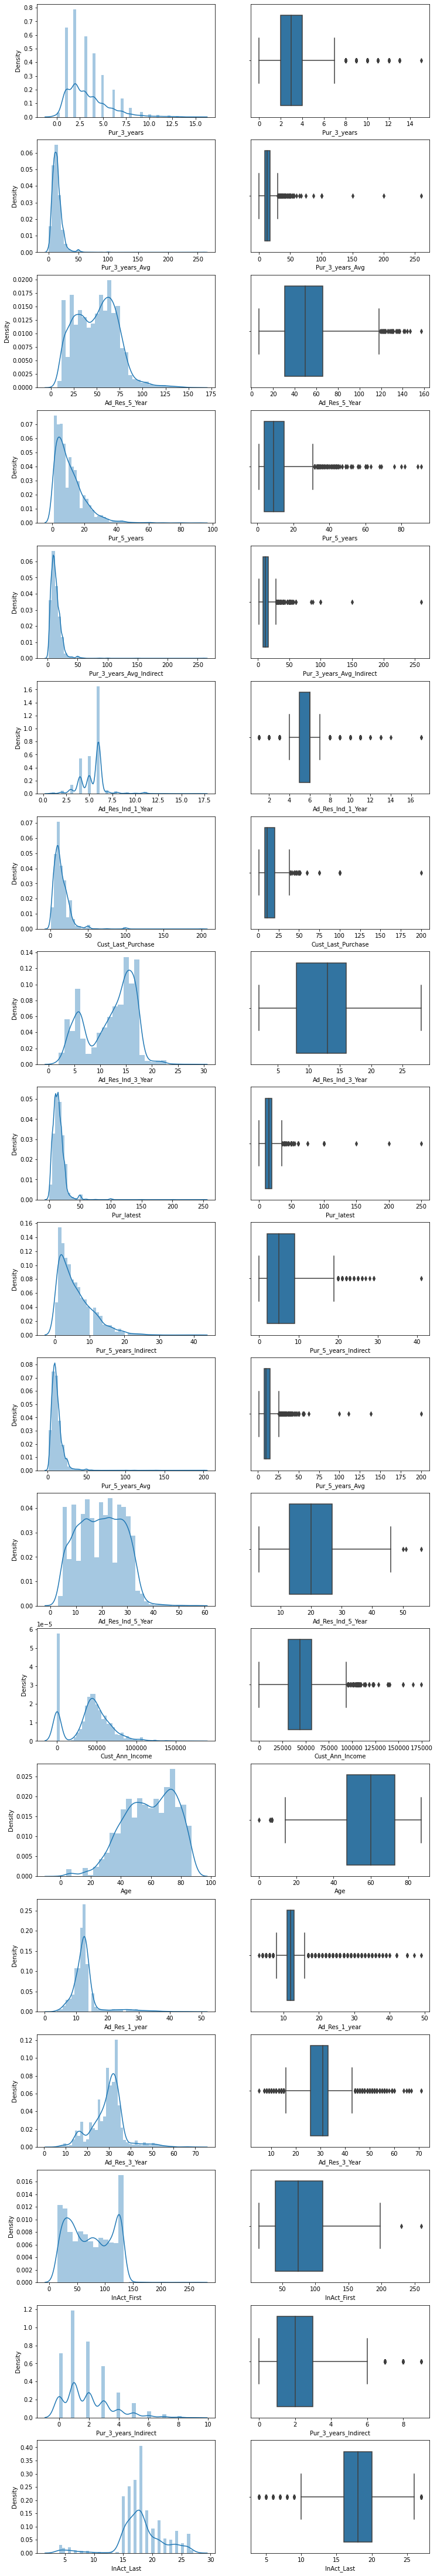

In [16]:
#Explore the numerical variables
fig, ax=plt.subplots(nrows=len(NumCols), ncols=2, figsize=(12,80))
for i in range(len(NumCols)):
    sns.distplot(data[NumCols[i]],ax=ax[i,0])
    sns.boxplot(data[NumCols[i]],ax=ax[i,1]);

### Some variables are highly skewed and we will use the log of them after filling missing values with median or other appropriate values. Some variables have outliers

## Feature Engineering

In [17]:
#Make new feature
data['Pur_5_years_Total']=data['Pur_5_years']*data['Pur_5_years_Avg']
data['Pur_3_years_Total']=data['Pur_3_years']*data['Pur_3_years_Avg']
data['Ad_Res_Rate_3_years']=data['Pur_3_years']/(data['Ad_Res_3_Year']+data['Ad_Res_Ind_3_Year']+1)

#Log Transformation 
data['log_Pur_3_years_Indirect']=np.log(data['Pur_3_years_Indirect']+1)
data['log_Pur_latest']=np.log(data['Pur_latest']+1)
data['log_Pur_3_years']=np.log(data['Pur_3_years']+1)
data['log_Pur_3_years_Avg_Indirect']=np.log(data['Pur_3_years_Avg_Indirect']+1)
data['log_Pur_5_years_Indirect']=np.log(data['Pur_5_years_Indirect']+1)
data['log_Pur_3_years_Avg']=np.log(data['Pur_3_years_Avg']+1)
data['log_Pur_5_years']=np.log(data['Pur_5_years']+1)
data['log_Ad_Res_Rate_3_years']=np.log(data['Ad_Res_Rate_3_years']+1)
data['log_Pur_5_years_Total']=np.log(data['Pur_5_years_Total']+1)
data['log_Pur_3_years_Total']=np.log(data['Pur_3_years_Total']+1)


#Make a list of new column
NewCols=['Ad_Res_Rate_3_years','Age',
         'log_Pur_3_years_Indirect','log_Pur_latest','log_Pur_3_years',
         'log_Pur_3_years_Avg_Indirect','log_Pur_5_years_Indirect',
        'log_Pur_3_years_Avg','log_Pur_5_years','log_Ad_Res_Rate_3_years',
        'log_Pur_5_years_Total','log_Pur_3_years_Total']


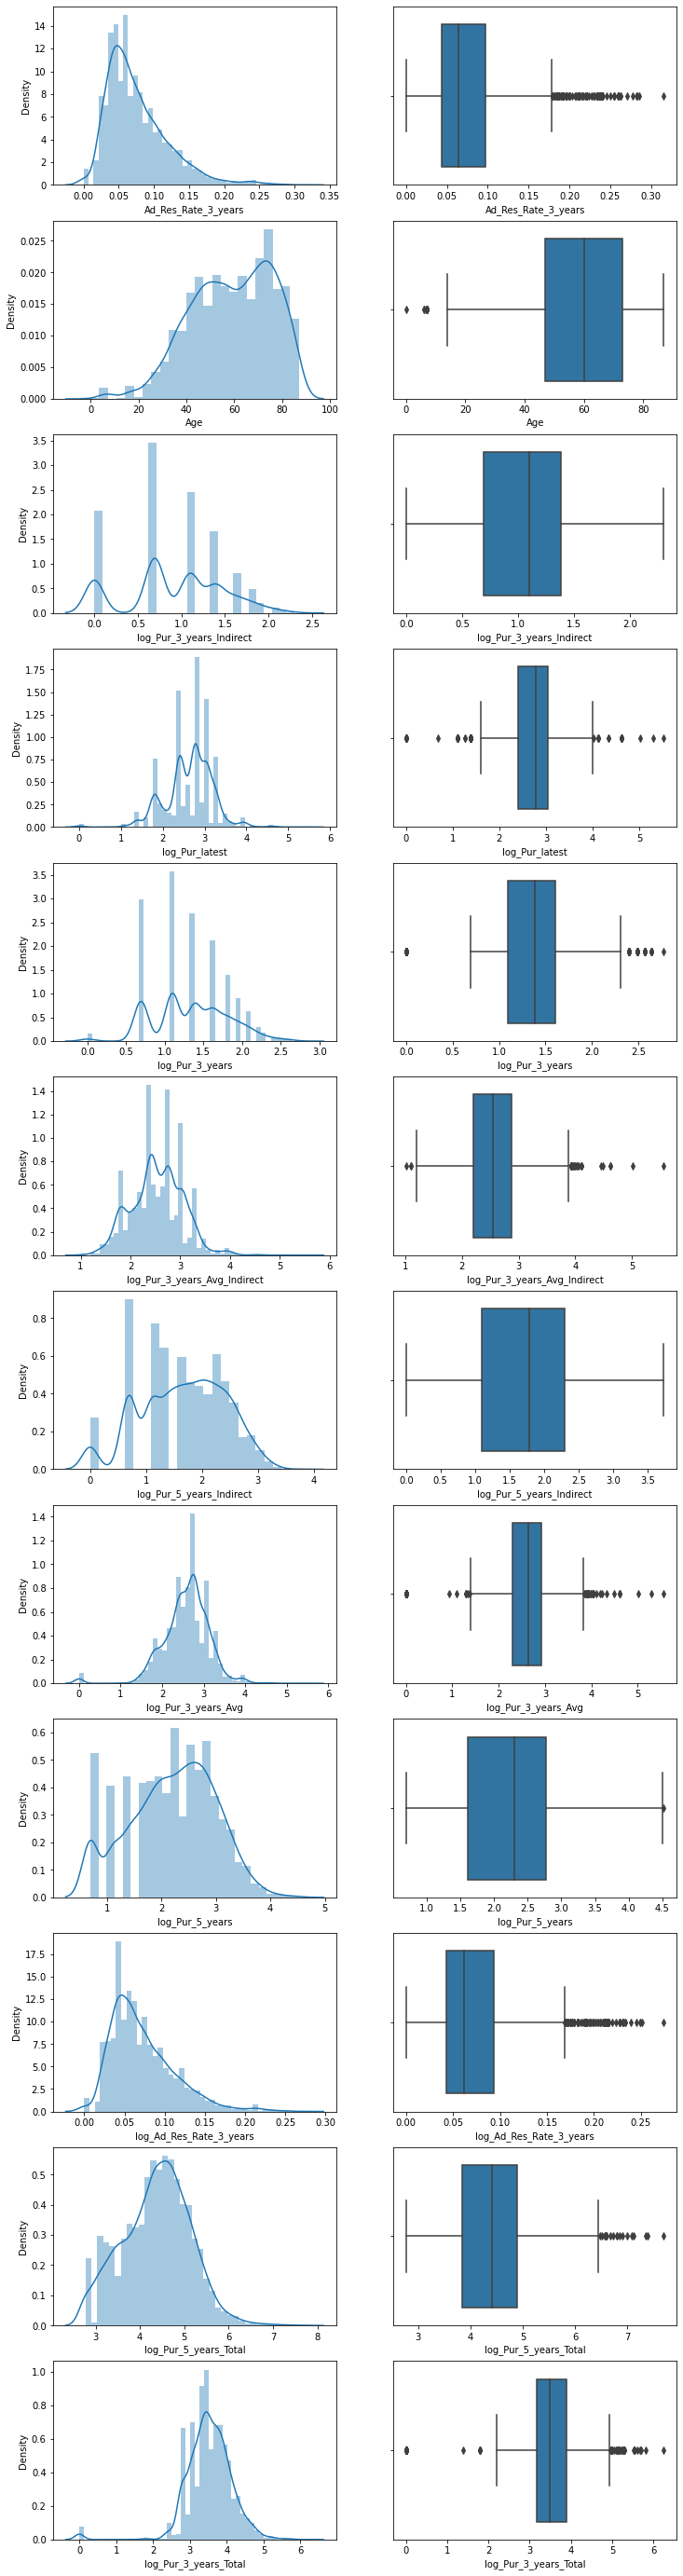

In [18]:
#Plot numerical variable after log transformation
fig, ax=plt.subplots(nrows=len(NewCols), ncols=2, figsize=(12,50))
for i in range(len(NewCols)):
    sns.distplot(data[NewCols[i]],ax=ax[i,0])
    sns.boxplot(data[NewCols[i]],ax=ax[i,1]);

### After log transformation, the distribution is looking like a bell shape like a normal distribution

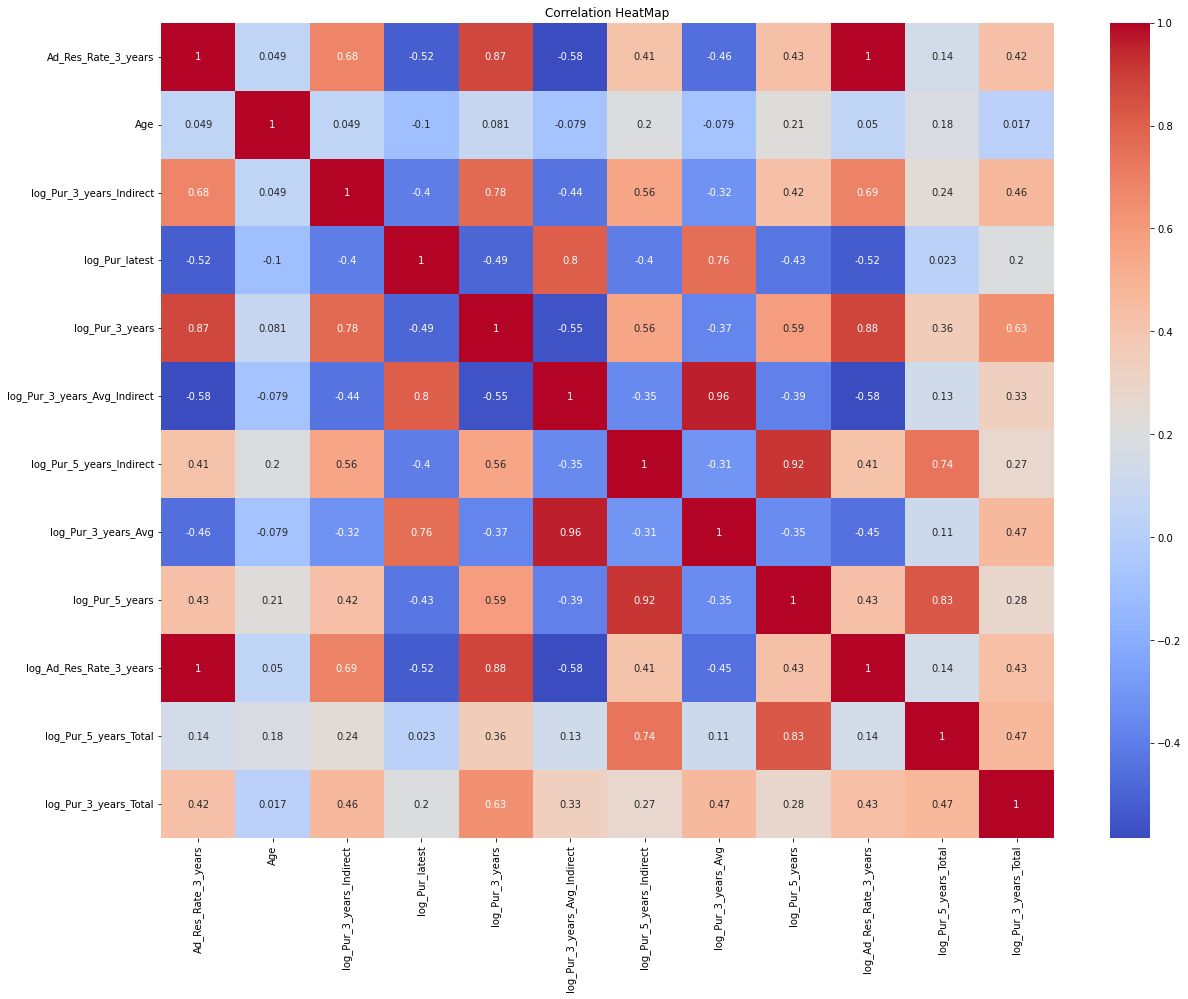

In [19]:
#Now we see the correlation between numerical variables
plt.figure(figsize=(20,15))
sns.heatmap(data[NewCols].corr(), cmap='coolwarm', annot=True, square=False)
plt.title('Correlation HeatMap');

## Data PreProcessing 
### Some numerical columns missing value simply means 0. We can fill missing values in a numerical column by replacing mean of the column, if the column is not skewed. If the column is skewed, median might be a better option.

In [20]:
#Define X,y
Features=NewCols+CatFeature
X=data[Features]
y=data['Potential_Customer']

In [21]:
#Split data into train test 
X_train, X_test, y_train, y_test = train_test_split(
                                 X, y, test_size=0.2, 
                                random_state=42, stratify=y)
avg_pur=data[(data.index.isin(X_train.index))&(data.Cust_Last_Purchase>0)]['Cust_Last_Purchase'].mean()

avg_pur

14.556695464362852

In [22]:
data.isna().sum()

Potential_Customer                 0
Cust_Last_Purchase              1882
Pur_3_years                        0
Pur_5_years                        0
Pur_3_years_Indirect               0
Pur_5_years_Indirect               0
Pur_latest                         0
Pur_3_years_Avg                    0
Pur_5_years_Avg                    0
Pur_3_years_Avg_Indirect         662
InAct_Last                         0
InAct_First                        0
Ad_Res_1_year                      0
Ad_Res_3_Year                      0
Ad_Res_5_Year                      0
Ad_Res_Ind_1_Year                  0
Ad_Res_Ind_3_Year                  0
Ad_Res_Ind_5_Year                  0
Status_Cust                        0
Status_Latest_Ad                   0
Age                              793
Gender                             0
Cust_Prop                          0
Cust_Ann_Income                    0
Status_Cust_new                    0
Pur_5_years_Total                  0
Pur_3_years_Total                  0
A

In [23]:
#Impute the missing values 
X_train.log_Pur_3_years_Avg_Indirect = X_train.log_Pur_3_years_Avg_Indirect.fillna(0)
X_test.log_Pur_3_years_Avg_Indirect = X_test.log_Pur_3_years_Avg_Indirect.fillna(0)

#Since the age is highly skewed we choose median to impute the missing value
X_train.Age = X_train.Age.fillna(int(X_train.Age.median())).astype(int)
X_test.Age = X_test.Age.fillna(int(X_train.Age.median())).astype(int)

In [24]:
#Change categorical variables with numerical variabels
X_train= pd.get_dummies(X_train, drop_first=True).reset_index(drop=True)
X_test= pd.get_dummies(X_test, drop_first=True).reset_index(drop=True)


In [25]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler().fit(X_train)
X_train_sc=pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test_sc=pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
train_PCA=X_train_sc[NewCols]
test_PCA=X_test_sc[NewCols]

In [26]:
#Perform PCA to handle correlation between numerical variables 
from sklearn.decomposition import PCA
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(train_PCA)


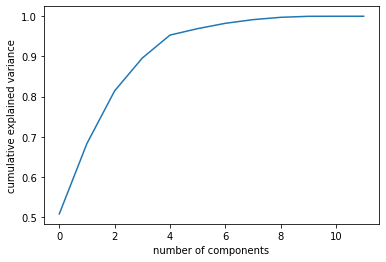

In [27]:
#Plot cumulative explained variance to see suitable number of components
pca = PCA().fit(train_PCA)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');


In [28]:
#Perform PCA with 8 number of components
pca=PCA(n_components=8).fit(train_PCA)
PCA_train=pd.DataFrame(pca.transform(train_PCA))
PCA_train.index=X_train.index
PCA_test=pd.DataFrame(pca.transform(test_PCA))
PCA_test.index=X_test.index


#Concate on dummy variables
X_train_pca=pd.concat([PCA_train, X_train[['Cust_Prop_U', 'Status_Cust_new_S',
       'Status_Cust_new_other', 'Gender_M', 'Gender_U']]], axis=1)
X_test_pca=pd.concat([PCA_test, X_test[['Cust_Prop_U', 'Status_Cust_new_S',
       'Status_Cust_new_other', 'Gender_M', 'Gender_U']]], axis=1)

In [29]:
#Feature Scaling
from sklearn.preprocessing import PowerTransformer
scaler_pw=PowerTransformer().fit(X_train[NewCols])
X_train_pw=pd.DataFrame(scaler_pw.transform(X_train[NewCols]), columns=NewCols)
X_test_pw=pd.DataFrame(scaler_pw.transform(X_test[NewCols]), columns=NewCols)
X_train_pw.index=X_train.index
X_test_pw.index=X_test.index
train_pw=pd.concat([X_train_pw, X_train[['Cust_Prop_U', 'Status_Cust_new_S',
       'Status_Cust_new_other', 'Gender_M', 'Gender_U']]],axis=1)
test_pw=pd.concat([X_test_pw, X_test[['Cust_Prop_U', 'Status_Cust_new_S',
       'Status_Cust_new_other', 'Gender_M', 'Gender_U']]], axis=1)

## Model

In [30]:
# 1st Model : KNN

knn_param_grid = {'n_neighbors': np.arange(1, 30),
                  'p': [1,2],
                 'weights':['uniform','distance']}
                   

knn_grid = GridSearchCV(KNeighborsClassifier(), 
                        knn_param_grid, cv=5, scoring = 'roc_auc', return_train_score=True)

knn_grid.fit(X_train, y_train)
print('Knn Best parameters', knn_grid.best_params_)
knn_model = knn_grid.best_estimator_
knn_model.fit(X_train, y_train)
print('Knn best score = ',knn_grid.best_score_ )

knn_pred = knn_model.predict(X_test)
print('Knn best model confusion matrix on test data  \n',confusion_matrix(y_test, knn_pred)  )
print('*********************************************')
print('Knn best model Precision  on test data = {:.2f}'.format(precision_score(y_test, knn_pred)))
print('Knn best model Recall  on test data = {:.2f}'.format(recall_score(y_test, knn_pred)))
print('Knn best model F1 on test data = {:.2f}'.format(f1_score(y_test, knn_pred)))
print('Knn best model Accuracy  on test data = {:.2f}'.format(accuracy_score(y_test, knn_pred)))
print('*********************************************')

Knn Best parameters {'n_neighbors': 15, 'p': 2, 'weights': 'distance'}
Knn best score =  0.5856070757052801
Knn best model confusion matrix on test data  
 [[212 165]
 [169 178]]
*********************************************
Knn best model Precision  on test data = 0.52
Knn best model Recall  on test data = 0.51
Knn best model F1 on test data = 0.52
Knn best model Accuracy  on test data = 0.54
*********************************************


In [31]:
# 2nd Model : Logistic Regression

logr_param_grid = {'C': [0.001, 0.004, 0.01, 0.1, 0.4, 1, 10, 50, 100],
                   'penalty' : ['l1', 'l2'],
                   'fit_intercept': [True, False]}

logr_grid = GridSearchCV(LogisticRegression(solver='liblinear'), 
                        logr_param_grid, cv=5, scoring = 'roc_auc', return_train_score=True)
logr_grid.fit(X_train, y_train)
print('LogisticRegression Best parameters', logr_grid.best_params_)
logr_model = logr_grid.best_estimator_
print('LogisticRegression best score = ',logr_grid.best_score_ )

logr_pred = logr_model.predict(X_test)
print('Logistic Regression best model confusion matrix on test data  \n',confusion_matrix(y_test, logr_pred)  )
print('*********************************************')
print('Logistic Regression best model Precision  on test data = {:.2f}'.format(precision_score(y_test, logr_pred)))
print('Logistic Regression best model Recall on test data = {:.2f}'.format(recall_score(y_test, logr_pred)))
print('Logistic Regression best model F1 on test data  = {:.2f}'.format(f1_score(y_test, logr_pred)))
print('Logistic Regression best model Accuracy  on test data = {:.2f}'.format(accuracy_score(y_test, logr_pred)))
print('*********************************************')

LogisticRegression Best parameters {'C': 0.1, 'fit_intercept': True, 'penalty': 'l1'}
LogisticRegression best score =  0.5963203756051974
Logistic Regression best model confusion matrix on test data  
 [[235 142]
 [190 157]]
*********************************************
Logistic Regression best model Precision  on test data = 0.53
Logistic Regression best model Recall on test data = 0.45
Logistic Regression best model F1 on test data  = 0.49
Logistic Regression best model Accuracy  on test data = 0.54
*********************************************


In [32]:
# 3rd Model : Decision Tree

dt_param_grid = {'max_depth': np.arange(1, 10)}

dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=1), 
                        dt_param_grid, cv=5, scoring = 'roc_auc', return_train_score=True)
dt_grid.fit(X_train, y_train)
print('DecisionTree best parameters', dt_grid.best_params_)
dt_model = dt_grid.best_estimator_
print('DecisionTree best score = ',dt_grid.best_score_ )


dt_pred = dt_model.predict(X_test)
print('Decision Tree best model confusion matrix on test data  \n',confusion_matrix(y_test, dt_pred)  )
print('*********************************************')
print('Decision Tree best model Precision  on test data = {:.2f}'.format(precision_score(y_test, dt_pred)))
print('Decision Tree best model Recall on test data = {:.2f}'.format(recall_score(y_test, dt_pred)))
print('Decision Tree best model F1 on test data  = {:.2f}'.format(f1_score(y_test, dt_pred)))
print('Decision Tree best model Accuracy  on test data = {:.2f}'.format(accuracy_score(y_test, dt_pred)))
print('*********************************************')

DecisionTree best parameters {'max_depth': 2}
DecisionTree best score =  0.5735514762926097
Decision Tree best model confusion matrix on test data  
 [[286  91]
 [218 129]]
*********************************************
Decision Tree best model Precision  on test data = 0.59
Decision Tree best model Recall on test data = 0.37
Decision Tree best model F1 on test data  = 0.46
Decision Tree best model Accuracy  on test data = 0.57
*********************************************


### From the data, we can calculate the revenue of models to choose the best model. Assume sending advertisement to each customer costs 5 dollar and the average purchase calculated on the train set remains the same for the test set. Average Cust_Last_Purchase is for those who are in the train set and had the last purchase (Cust_Last_Purchase>0).  
- cost = advertisement_cost * number of the predicted positive
- lost = average_purchase * number of the predicted negative but they have been positive
- gain = average_purchase * number of the predicted positive and they have been positive
- value = gain - lost - cost
- revenue = gain - cost

In [40]:
prec_matrix_str = [knn_pred,logr_pred,dt_pred]
prec_matrix_str_name = ['KNN','LOG REGRESSION','DECISION TREE']
ad_cost=5
avg_pur=data[(data.index.isin(X_train.index))&(data.Cust_Last_Purchase>0)]['Cust_Last_Purchase'].mean()

for i in range(0,3):
    tn = confusion_matrix(y_test, prec_matrix_str[i])[0,0]
    fn = confusion_matrix(y_test, prec_matrix_str[i])[1,0]
    fp = confusion_matrix(y_test, prec_matrix_str[i])[0,1]
    tp = confusion_matrix(y_test, prec_matrix_str[i])[1,1]
    total_positive = tp+fp
    cost = ad_cost*total_positive
    lost = avg_pur*fn
    revenue = avg_pur*tp
    profit = gain - cost
    print('*********************************************')
    print('Model : {}'.format(prec_matrix_str_name[i]))
    print('Cost : ${:.2f}'.format(cost))
    print('Lost : ${:.2f}'.format(lost))
    print('Revenue : ${:.2f}'.format(gain))
    print('Profit : ${:.2f}'.format(revenue))
    print('*********************************************')

*********************************************
Model : KNN
Cost : $1715.00
Lost : $2540.78
Revenue : $1939.41
Profit : $839.41
*********************************************
*********************************************
Model : LOG REGRESSION
Cost : $1495.00
Lost : $2856.50
Revenue : $1939.41
Profit : $839.41
*********************************************
*********************************************
Model : DECISION TREE
Cost : $1100.00
Lost : $3277.45
Revenue : $1939.41
Profit : $839.41
*********************************************


### Conclusion
According to confusion matrix, TN is actually and predicted as a non-potential customer, TP is actually and predicted as a potential customer. The errors of the model are FN and FP, where FN is actually a potential customer but predicted as a non-potential customer and FP is actually a non-potential predicted as potential.KNN model predicted the highest number of TP which is potential customer and from the calculation, we can see KNN is the best model which give the highest revenue.